In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import numpy as np

os.chdir('C:\\Users\\jihun\\Downloads')

df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [2]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [3]:
df['Customer Type'].dtype == 'object'

True

In [4]:
len(df['id'].unique())

3000

In [5]:
num_features = []
ord_features = []
cat_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_features.append(col)
    elif len(df[col].unique()) >= 20:
        num_features.append(col)
    else:
        ord_features.append(col)

num_features.remove('id')
ord_features.remove('target')

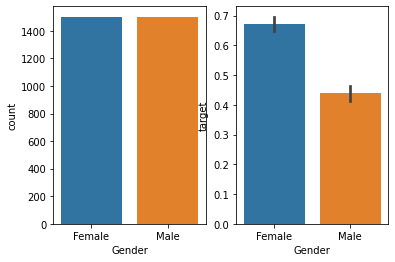

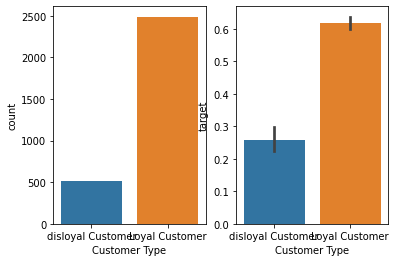

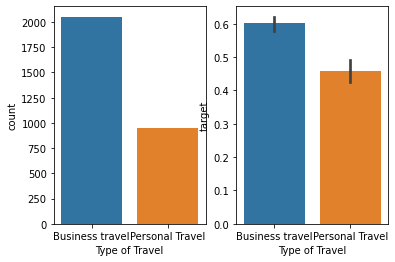

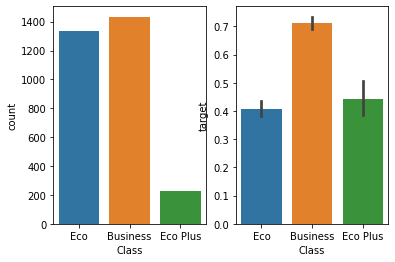

In [6]:
for col in cat_features:
    fig,ax = plt.subplots(1,2)
    sns.countplot(x=col,data=df,ax=ax[0])
    sns.barplot(x=col,y='target',data=df,ax=ax[1])

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

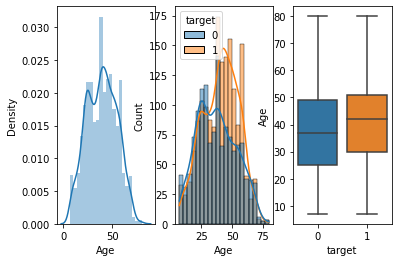

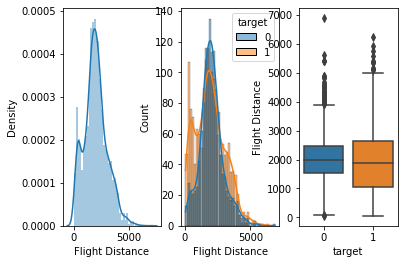

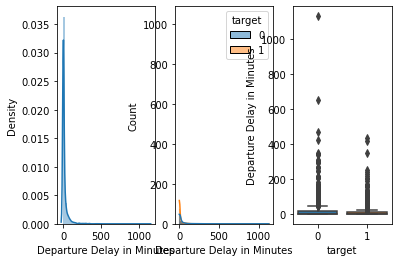

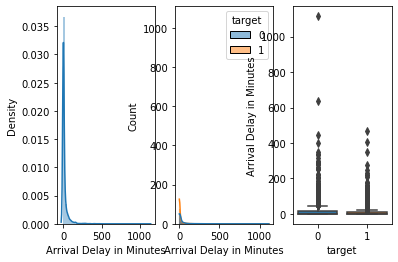

In [7]:
for col in num_features:
    fig,ax = plt.subplots(1,3)
    sns.distplot(df[col],ax=ax[0])
    sns.histplot(x=col,ax=ax[1],data=df,hue='target',kde=True)
    sns.boxplot(x='target',y=col,data=df,ax=ax[2])

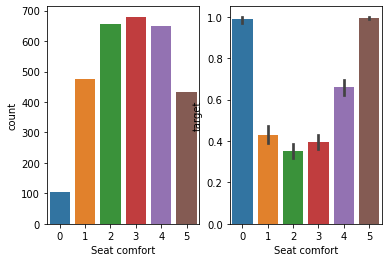

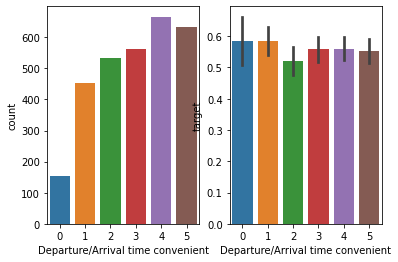

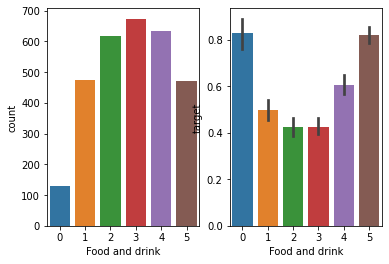

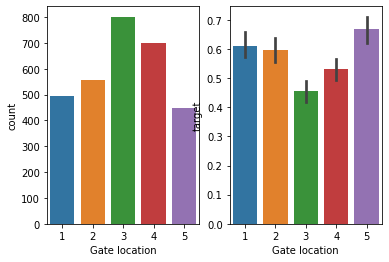

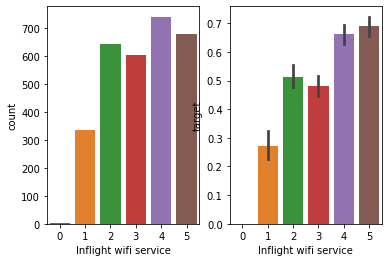

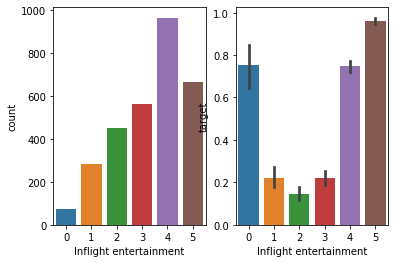

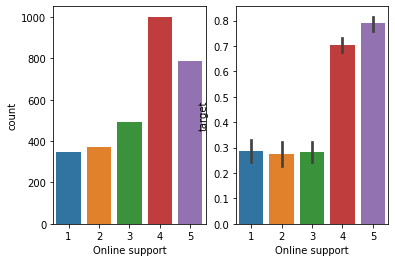

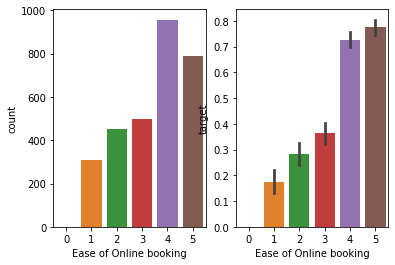

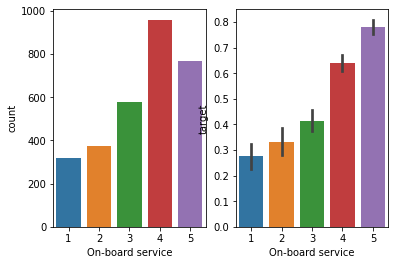

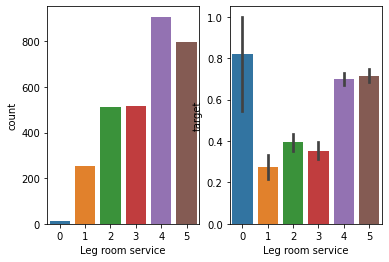

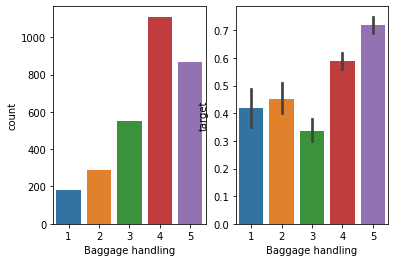

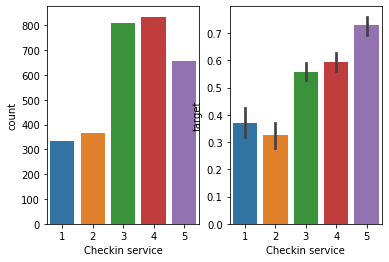

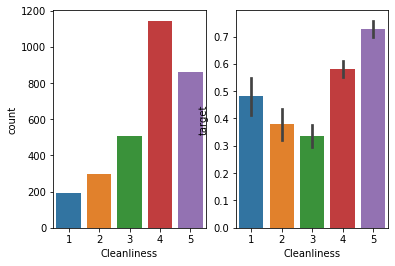

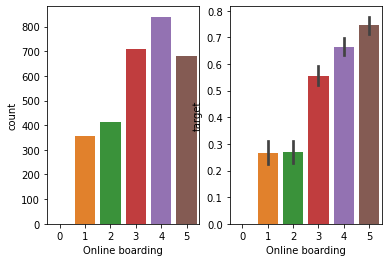

In [8]:
for col in ord_features:
    fig,ax = plt.subplots(1,2)
    sns.countplot(ax=ax[0],x=col,data=df)
    sns.barplot(ax=ax[1],x=col,y='target',data=df)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
for col in cat_features:
    df=pd.concat([df,pd.get_dummies(df[col])],axis=1)
    test=pd.concat([test,pd.get_dummies(test[col])],axis=1)

df = df.drop(columns = cat_features)
test = test.drop(columns = cat_features)

In [11]:
df

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,target,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,1,22,1599,3,0,3,3,4,3,4,...,0,1,0,0,1,1,0,0,1,0
1,2,37,2810,2,4,4,4,1,4,3,...,0,1,0,1,0,1,0,1,0,0
2,3,46,2622,1,1,1,1,4,5,5,...,1,0,1,1,0,1,0,1,0,0
3,4,24,2348,3,3,3,3,3,3,3,...,0,1,0,0,1,1,0,0,1,0
4,5,58,105,3,3,3,3,4,4,5,...,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,30,2377,1,5,1,1,1,4,4,...,0,0,1,1,0,0,1,0,1,0
2996,2997,24,1643,2,4,3,4,5,3,5,...,0,1,0,0,1,1,0,0,1,0
2997,2998,22,1442,2,2,2,3,4,2,4,...,0,1,0,0,1,1,0,0,1,0
2998,2999,33,2158,2,2,2,5,4,2,4,...,0,1,0,0,1,1,0,1,0,0


In [12]:
ord_features

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

In [13]:
for col in ord_features:
    print(col, len(df[col].unique()))

Seat comfort 6
Departure/Arrival time convenient 6
Food and drink 6
Gate location 5
Inflight wifi service 6
Inflight entertainment 6
Online support 5
Ease of Online booking 6
On-board service 5
Leg room service 6
Baggage handling 5
Checkin service 5
Cleanliness 5
Online boarding 6


In [14]:
ord_include_0 = []
ord_no_0 = []
for col in ord_features:
    if len(df[col].unique()) == 5:
        ord_no_0.append(col)
    else:
        ord_include_0.append(col)

In [15]:
df['mean_score'] = df[ord_no_0].apply(lambda x: np.mean(x),axis = 1)
test['mean_score'] = test[ord_no_0].apply(lambda x: np.mean(x),axis = 1)

In [16]:
df.loc[df['id']==1]

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,mean_score
0,1,22,1599,3,0,3,3,4,3,4,...,1,0,0,1,1,0,0,1,0,4.166667


In [17]:
for col in ord_include_0:
    df.loc[df[col] == 0,col] = np.NaN
    test.loc[test[col] == 0, col] = np.NaN

In [18]:
df.isnull().sum()

id                                     0
Age                                    0
Flight Distance                        0
Seat comfort                         106
Departure/Arrival time convenient    154
Food and drink                       129
Gate location                          0
Inflight wifi service                  2
Inflight entertainment                73
Online support                         0
Ease of Online booking                 1
On-board service                       0
Leg room service                      11
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        1
Departure Delay in Minutes             0
Arrival Delay in Minutes               0
target                                 0
Female                                 0
Male                                   0
Loyal Customer                         0
disloyal Customer                      0
Business travel 

In [19]:
test.isnull().sum()

id                                    0
Age                                   0
Flight Distance                       0
Seat comfort                         64
Departure/Arrival time convenient    90
Food and drink                       80
Gate location                         0
Inflight wifi service                 1
Inflight entertainment               39
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                     10
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes              0
Female                                0
Male                                  0
Loyal Customer                        0
disloyal Customer                     0
Business travel                       0
Personal Travel                       0


In [20]:
df_for_impute = df.drop(columns = ord_include_0)
df_for_impute = df_for_impute.drop(columns = ['id','target'])

test_for_impute = test.drop(columns = ord_include_0)
test_for_impute = test_for_impute.drop(columns = ['id'])

In [21]:
df_for_impute.head(3)

,Age,Flight Distance,Gate location,Online support,On-board service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,mean_score
0,22,1599,3,4,5,4,4,5,0,0.0,1,0,0,1,1,0,0,1,0,4.166667
1,37,2810,4,3,5,2,1,5,18,18.0,1,0,1,0,1,0,1,0,0,3.333333
2,46,2622,1,5,4,4,5,4,0,0.0,0,1,1,0,1,0,1,0,0,3.833333


In [22]:
df_copy = df.copy()

In [23]:
df_null_idx = np.where(df['Seat comfort'].isnull())
test_null_idx = np.where(test['Seat comfort'].isnull())
df_null = df_for_impute.iloc[df_null_idx]
test_null = test_for_impute.iloc[test_null_idx]


df_not_null_idx = df['Seat comfort'].dropna().index
test_not_null_idx = test['Seat comfort'].dropna().index
df_not_null = df_for_impute.iloc[df_not_null_idx]
df_not_null_target = df['Seat comfort'].iloc[df_not_null_idx]
test_not_null_target = test['Seat comfort'].iloc[test_not_null_idx]

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(df_not_null,df_not_null_target)
df_pred = model.predict(df_null)

i=0
for idx in df_null_idx[0]:
    print(idx)
    df_copy.loc[idx,'Seat comfort'] = df_pred[i]
    i+=1

12
19
27
86
100
121
145
199
204
222
235
259
286
294
341
355
363
382
394
440
464
477
515
549
553
588
612
629
675
697
708
715
744
886
906
915
920
956
974
987
1010
1015
1035
1059
1235
1328
1329
1351
1424
1436
1492
1535
1549
1578
1592
1628
1644
1653
1655
1664
1765
1777
1798
1816
1862
1865
1874
1879
1887
1956
1962
1991
2002
2013
2069
2080
2086
2092
2114
2136
2154
2262
2276
2295
2312
2378
2412
2538
2546
2597
2642
2661
2677
2728
2744
2747
2762
2835
2838
2873
2881
2894
2951
2959
2968
2972


In [24]:
df_copy['Seat comfort'].isnull().sum()

0

In [25]:
from sklearn.ensemble import RandomForestClassifier
for col in ord_include_0:
    model = RandomForestClassifier()
    
    df_null_idx = np.where(df[col].isnull())
    test_null_idx = np.where(test[col].isnull())
    df_null = df_for_impute.iloc[df_null_idx]
    test_null = test_for_impute.iloc[test_null_idx]


    df_not_null_idx = df[col].dropna().index
    test_not_null_idx = test[col].dropna().index
    df_not_null = df_for_impute.iloc[df_not_null_idx]
    df_not_null_target = df[col].iloc[df_not_null_idx]
    test_not_null_target = test[col].iloc[test_not_null_idx]    



    model.fit(df_not_null,df_not_null_target)
    df_pred = model.predict(df_null)
    df.loc[df_null_idx[0],col] = df_pred
    
    if len(test_null) > 0:
        test_pred = model.predict(test_null)
        test.loc[test_null_idx[0],col] = test_pred

In [26]:
df.head(1)

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,mean_score
0,1,22,1599,3.0,4.0,3.0,3,4.0,3.0,4,...,1,0,0,1,1,0,0,1,0,4.166667


<AxesSubplot:xlabel='target', ylabel='mean_score'>

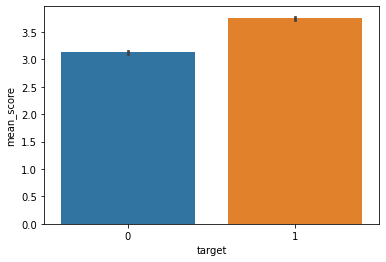

In [27]:
sns.barplot(x='target',y='mean_score',data=df)

In [34]:
df['mean_after_impute'] = df[ord_features].apply(lambda x: np.mean(x),axis=1)
test['mean_after_impute'] = test[ord_features].apply(lambda x: np.mean(x),axis=1)

In [29]:
df['mean_after_impute']

0       3.857143
1       3.285714
2       3.285714
3       3.214286
4       3.857143
          ...   
2995    2.785714
2996    3.428571
2997    3.000000
2998    3.642857
2999    2.000000
Name: mean_after_impute, Length: 3000, dtype: float64

<AxesSubplot:xlabel='target', ylabel='mean_score'>

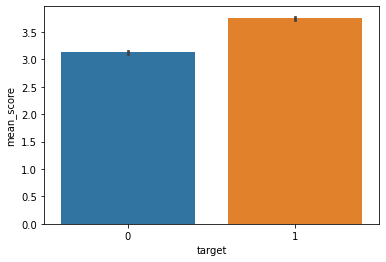

In [30]:
sns.barplot(x='target',y='mean_score',data=df)

In [31]:
df['mean_after_impute']
df['mean_score']

0       4.166667
1       3.333333
2       3.833333
3       3.333333
4       4.000000
          ...   
2995    2.833333
2996    3.166667
2997    3.333333
2998    4.833333
2999    2.000000
Name: mean_score, Length: 3000, dtype: float64

In [35]:
df.corr()['target'][['mean_score','mean_after_impute']]

mean_score           0.435141
mean_after_impute    0.550924
Name: target, dtype: float64

In [37]:
df = df.drop(columns='mean_score')
test = test.drop(columns='mean_score')

In [40]:
df.columns

Index(['id', 'Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target',
       'Female', 'Male', 'Loyal Customer', 'disloyal Customer',
       'Business travel', 'Personal Travel', 'Business', 'Eco', 'Eco Plus',
       'mean_after_impute'],
      dtype='object')

In [43]:
df['total_delayed'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']
test['total_delayed'] = test['Arrival Delay in Minutes'] + test['Departure Delay in Minutes']
df = df.drop(columns=['Arrival Delay in Minutes','Departure Delay in Minutes'])
test = test.drop(columns=['Arrival Delay in Minutes','Departure Delay in Minutes'])

In [51]:
features = df.drop(columns=['id','target'])
target = df['target']

X_train,X_val,y_train,y_val = train_test_split(features,target)
print(len(X_train))
print(len(y_train))

2250
2250


In [54]:
df

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,mean_after_impute,total_delayed
0,1,22,1599,3.0,4.0,3.0,3,4.0,3.0,4,...,0,0,1,1,0,0,1,0,3.857143,0.0
1,2,37,2810,2.0,4.0,4.0,4,1.0,4.0,3,...,0,1,0,1,0,1,0,0,3.285714,36.0
2,3,46,2622,1.0,1.0,1.0,1,4.0,5.0,5,...,1,1,0,1,0,1,0,0,3.285714,0.0
3,4,24,2348,3.0,3.0,3.0,3,3.0,3.0,3,...,0,0,1,1,0,0,1,0,3.214286,12.0
4,5,58,105,3.0,3.0,3.0,3,4.0,4.0,5,...,0,1,0,1,0,1,0,0,3.857143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,30,2377,1.0,5.0,1.0,1,1.0,4.0,4,...,1,1,0,0,1,0,1,0,2.785714,436.0
2996,2997,24,1643,2.0,4.0,3.0,4,5.0,3.0,5,...,0,0,1,1,0,0,1,0,3.428571,33.0
2997,2998,22,1442,2.0,2.0,2.0,3,4.0,2.0,4,...,0,0,1,1,0,0,1,0,3.000000,131.0
2998,2999,33,2158,2.0,2.0,2.0,5,4.0,2.0,4,...,0,0,1,1,0,1,0,0,3.642857,3.0


In [59]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'target', 'Female', 'Male', 'Loyal Customer', 'disloyal Customer',
       'Business travel', 'Personal Travel', 'Business', 'Eco', 'Eco Plus',
       'mean_after_impute', 'total_delayed'],
      dtype='object')

In [55]:
df = df.drop(columns = 'id')
test = test.drop(columns = 'id')

In [61]:
df = df.drop(columns = ['Female','Loyal Customer','Eco Plus'])
test = test.drop(columns = ['Female','Loyal Customer','Eco Plus'])

In [71]:
features = df.drop(columns = 'target')
target = df['target']
cols = features.columns

In [67]:
scaler = MinMaxScaler()
scaler.fit(features)
df_scaled = scaler.transform(features)
test_scaled = scaler.transform(test)

In [76]:
df_train = pd.concat([pd.DataFrame(df_scaled,columns = cols),target],axis = 1)
df_test = pd.DataFrame(test_scaled,columns = cols)

In [77]:
df_train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Online boarding,Male,disloyal Customer,Business travel,Personal Travel,Business,Eco,mean_after_impute,total_delayed,target
0,0.205479,0.226501,0.50,0.75,0.50,0.50,0.75,0.50,0.75,0.75,...,0.75,0.0,1.0,1.0,0.0,0.0,1.0,0.693878,0.000000,0
1,0.410959,0.403807,0.25,0.75,0.75,0.75,0.00,0.75,0.50,1.00,...,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.530612,0.016050,0
2,0.534247,0.376281,0.00,0.00,0.00,0.00,0.75,1.00,1.00,0.75,...,0.50,1.0,0.0,1.0,0.0,1.0,0.0,0.530612,0.000000,1
3,0.232877,0.336164,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,...,0.50,0.0,1.0,1.0,0.0,0.0,1.0,0.510204,0.005350,0
4,0.698630,0.007760,0.50,0.50,0.50,0.50,0.75,0.75,1.00,0.75,...,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.693878,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.315068,0.340410,0.00,1.00,0.00,0.00,0.00,0.75,0.75,0.00,...,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.387755,0.194383,0
2996,0.232877,0.232943,0.25,0.75,0.50,0.75,1.00,0.50,1.00,1.00,...,1.00,0.0,1.0,1.0,0.0,0.0,1.0,0.571429,0.014712,0
2997,0.205479,0.203514,0.25,0.25,0.25,0.50,0.75,0.25,0.75,0.75,...,0.75,0.0,1.0,1.0,0.0,0.0,1.0,0.448980,0.058404,0
2998,0.356164,0.308346,0.25,0.25,0.25,1.00,0.75,0.25,0.75,0.75,...,0.75,0.0,1.0,1.0,0.0,1.0,0.0,0.632653,0.001337,0


In [78]:
df_test

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Male,disloyal Customer,Business travel,Personal Travel,Business,Eco,mean_after_impute,total_delayed
0,0.739726,0.290630,0.00,0.00,0.00,0.00,0.50,1.00,1.00,1.00,...,1.00,0.50,0.0,0.0,0.0,1.0,0.0,1.0,0.571429,0.048596
1,0.273973,0.262665,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,...,0.75,0.00,0.0,1.0,1.0,0.0,1.0,0.0,0.244898,0.000000
2,0.616438,0.229868,0.75,0.75,0.75,0.75,0.75,0.50,0.75,1.00,...,1.00,0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.795918,0.000000
3,0.643836,0.509810,0.75,0.75,0.75,0.75,1.00,0.75,1.00,0.25,...,0.25,0.00,1.0,0.0,1.0,0.0,1.0,0.0,0.530612,0.000000
4,0.465753,0.207760,0.75,0.50,0.50,0.50,0.75,0.75,0.75,0.75,...,0.75,0.75,0.0,0.0,1.0,0.0,0.0,1.0,0.571429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.753425,0.000293,0.50,0.00,0.00,0.00,0.75,0.50,0.75,0.50,...,0.50,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.326531,0.000000
1996,0.356164,0.275988,0.75,0.75,0.75,0.75,0.50,1.00,1.00,1.00,...,1.00,0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.775510,0.086491
1997,0.301370,0.343485,0.50,1.00,0.75,0.75,0.50,0.50,0.50,0.50,...,0.25,0.50,1.0,0.0,1.0,0.0,0.0,1.0,0.469388,0.001337
1998,0.602740,0.051830,1.00,0.25,1.00,0.75,0.75,0.50,0.50,0.25,...,0.25,0.25,0.0,0.0,0.0,1.0,1.0,0.0,0.469388,0.075791


In [79]:
from pycaret.classification import *

In [80]:
model = setup(
    data = df_train,
    target = "target",
    fold = 5
)

,Description,Value
0,Session id,5154
1,Target,target
2,Target type,Binary
3,Original data shape,"(3000, 25)"
4,Transformed data shape,"(3000, 25)"
5,Transformed train set shape,"(2100, 25)"
6,Transformed test set shape,"(900, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [83]:
top5_model = compare_models(
               round=4,
               sort="Accuracy",
               n_select = 5 )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:31:22
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9214,0.9748,0.9264,0.9320,0.9292,0.8410,0.8411,2.9840
et,Extra Trees Classifier,0.9152,0.9701,0.9238,0.9241,0.9238,0.8283,0.8286,0.1420
xgboost,Extreme Gradient Boosting,0.9119,0.9701,0.9178,0.9234,0.9205,0.8217,0.8218,0.2000
lightgbm,Light Gradient Boosting Machine,0.9095,0.9701,0.9178,0.9194,0.9186,0.8168,0.8169,0.8320
gbc,Gradient Boosting Classifier,0.9071,0.9681,0.9170,0.9163,0.9165,0.8119,0.8122,0.2480
rf,Random Forest Classifier,0.9010,0.9646,0.9135,0.9089,0.9112,0.7992,0.7993,0.1420
knn,K Neighbors Classifier,0.8852,0.9417,0.8750,0.9157,0.8946,0.7688,0.7704,2.9400
ada,Ada Boost Classifier,0.8843,0.9464,0.9050,0.8892,0.8969,0.7650,0.7653,0.1200
lr,Logistic Regression,0.8538,0.9291,0.8861,0.8561,0.8707,0.7026,0.7035,4.2720
ridge,Ridge Classifier,0.8524,0.9301,0.8947,0.8481,0.8707,0.6990,0.7005,0.0180


In [84]:
tuned_top5 = [tune_model(i,n_iter = 10) for i in top5_model]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9190,0.9710,0.9487,0.9098,0.9289,0.8350,0.8360
1,0.9190,0.9724,0.9231,0.9310,0.9270,0.8361,0.8362
2,0.9143,0.9691,0.9017,0.9420,0.9214,0.8273,0.8282
3,0.9238,0.9725,0.9227,0.9389,0.9307,0.8461,0.8463
4,0.9286,0.9738,0.9399,0.9319,0.9359,0.8553,0.8553
Mean,0.9210,0.9718,0.9272,0.9307,0.9288,0.8400,0.8404
Std,0.0049,0.0016,0.0162,0.0112,0.0047,0.0097,0.0094


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.9476,0.8675,0.8865,0.8769,0.7257,0.7259
1,0.8976,0.9581,0.9060,0.9099,0.9079,0.7926,0.7927
2,0.8976,0.9486,0.9017,0.9134,0.9075,0.7929,0.7930
3,0.9024,0.9697,0.9013,0.9211,0.9111,0.8029,0.8031
4,0.8881,0.9584,0.8884,0.9079,0.8980,0.7741,0.7743
Mean,0.8900,0.9565,0.8930,0.9077,0.9003,0.7776,0.7778
Std,0.0137,0.0080,0.0140,0.0115,0.0125,0.0276,0.0275


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9719,0.8889,0.9369,0.9123,0.8083,0.8096
1,0.8976,0.9687,0.8803,0.9321,0.9055,0.7940,0.7955
2,0.9119,0.9670,0.8889,0.9498,0.9183,0.8229,0.8251
3,0.9262,0.9701,0.9099,0.9550,0.9319,0.8515,0.8526
4,0.9071,0.9672,0.8884,0.9409,0.9139,0.8133,0.8149
Mean,0.9095,0.9690,0.8913,0.9429,0.9164,0.8180,0.8196
Std,0.0095,0.0018,0.0098,0.0083,0.0088,0.0192,0.0191


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8881,0.9605,0.8974,0.9013,0.8994,0.7734,0.7734
1,0.8857,0.9630,0.9017,0.8941,0.8979,0.7681,0.7682
2,0.8976,0.9595,0.9103,0.9064,0.9083,0.7924,0.7924
3,0.9095,0.9743,0.9142,0.9221,0.9181,0.8170,0.8171
4,0.8905,0.9615,0.9142,0.8912,0.9025,0.7776,0.7779
Mean,0.8943,0.9638,0.9075,0.9030,0.9052,0.7857,0.7858
Std,0.0086,0.0054,0.0068,0.0109,0.0074,0.0176,0.0176


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9262,0.9702,0.9359,0.9319,0.9339,0.8503,0.8504
1,0.9048,0.9668,0.8974,0.9292,0.9130,0.8079,0.8084
2,0.9190,0.9679,0.9274,0.9274,0.9274,0.8360,0.8360
3,0.9238,0.9720,0.9185,0.9427,0.9304,0.8463,0.8466
4,0.8976,0.9692,0.9356,0.8862,0.9102,0.7913,0.7929
Mean,0.9143,0.9692,0.9230,0.9235,0.9230,0.8263,0.8269
Std,0.0112,0.0018,0.0143,0.0194,0.0095,0.0230,0.0224


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [85]:
blender_top5 = stack_models(estimator_list=top5_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9214,0.9734,0.9274,0.9313,0.9293,0.8409,0.8409
1,0.9119,0.9741,0.9231,0.9191,0.9211,0.8214,0.8214
2,0.9190,0.9677,0.9231,0.9310,0.9270,0.8361,0.8362
3,0.9333,0.9816,0.9270,0.9515,0.9391,0.8655,0.8658
4,0.9167,0.9733,0.9399,0.9125,0.9260,0.8307,0.8312
Mean,0.9205,0.9740,0.9281,0.9291,0.9285,0.8389,0.8391
Std,0.0072,0.0044,0.0062,0.0133,0.0059,0.0148,0.0149


In [86]:
final_model = finalize_model(blender_top5)


In [87]:
y_pred = predict_model(final_model, data=df_test)



In [89]:
y_pred['prediction_label']

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: prediction_label, Length: 2000, dtype: int32

In [91]:
sample_submission['target'] = y_pred['prediction_label']

In [94]:
sample_submission.to_csv('ss4.csv',index=False)

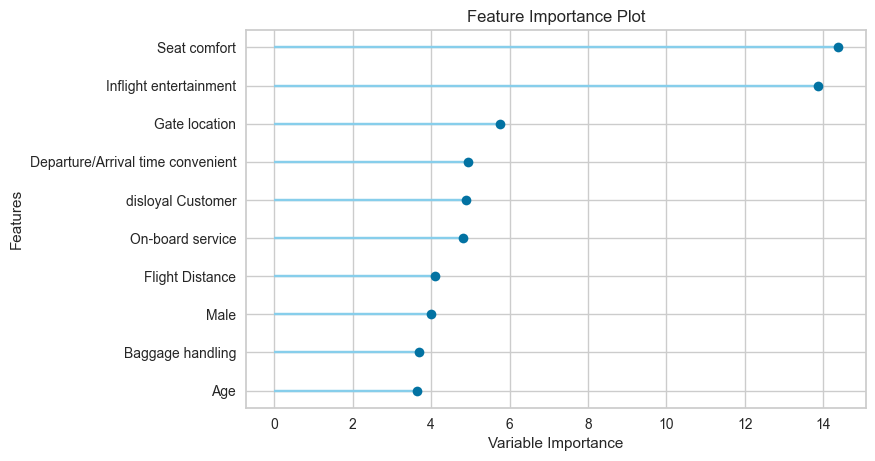

In [95]:
plot_model(estimator = top5_model[0], plot = 'feature')
